# Algoritmos de Clustering
**Clústering** se refiere a métodos que nos ayudan a formar subgrupos dentro de un conjunto de datos. La idea es que las observaciones que pertenezcan a un mismo grupo o *cluster* tengan **características similares** entre sí.

A este tipo de algoritmos los clasificamos como **aprendizaje no supervisado** porque no tenemos una **variable de respuesta o dependiente** que queramos predecir. En este caso no tenemos una **etiqueta** en los datos (no hay variable $y$). 

Un ejemplo clásico de clusterización es cuando queremos hacer una *segmentación de mercado*. Usualmente, las compañías cuentan con datos específicos de sus clientes. Con un algoritmo de clústering, se pueden formar grupos específicos de clientes que sean más receptivos a ciertas campañas.

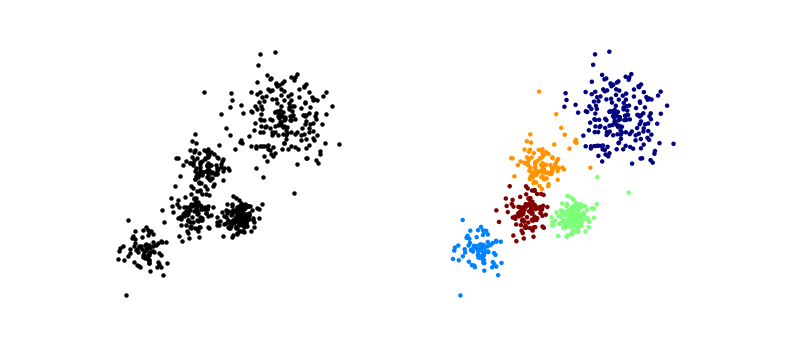

El algoritmo más popular de clústering se llama *K-means*.

# K-Means

La premisa del algoritmo K-Means es definir $n$ grupos de tal manera que la distancia de los datos que pertenecen a cada grupo al centro de su respectivo grupo sea la más pequeña posible.

Matemáticamente, lo que queremos minimizar es la **within/intra-cluster sum of squares** (WCSS):
$$
W\biggl(\bigcup_{i=1}^k C_i\biggr) 
= \sum_{i=1}^k W(C_i) 
= \sum_{i=1}^k \biggl( \sum_{\boldsymbol x \in C_i} \| \boldsymbol x - \mu_i \|^2 \biggr)
$$

donde
- $k$ es el número de clústers que vamos a formar, 
- $C = \{C_1, C_2, \dots, C_k\}$, son los grupos a formar,
- $\boldsymbol x$ representan las observaciones,
- $\boldsymbol \mu_i$ es el punto céntrico del grupo $C_i$

Los pasos a realizar son:

  - Input: Definir el número de clústers
  - 1\. Formar aleatoriamente grupos.
  - 2\. En un ciclo:
    - a\. Para cada clúster, calcular el centroide (promedio de las observaciones).
    - b\. Reasignar a cada observación a un nuevo clúster tomando en cuenta la distancia al centroide más cercano.

Este proceso se repite hasta que los clústers ya no cambien.


<img src="images/kmeans.png" width="480" align="center"/>


La pregunta ahora es ¿Cuál es el número de clústers que hay que escoger?

La mayoría de las veces, el valor de $k$ viene determinado por la necesidad de negocio o del problema. Por ejemplo, en el caso de segmentación de mercado, puede ser que la dirección solicite crear N grupos para categorizar a sus clientes.

Sin embargo, existen metaheurísticas que nos ayudan a determinar este número con un fundamento mayor.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

In [ ]:
# Vamos a cargar los datos de clústering.
cluster_df = pd.read_csv('data/cluster data.csv')
cluster_df.head()

,x0,x1
0,-2.981933,-2.667170
1,-0.703946,-3.307770
2,-2.682024,-3.397886
3,-2.051242,-3.306723
4,-2.636982,-4.025322


Los datos de la tabla anterior fueron generados para formar naturalmente 5 clústers:
1. Centro en (-2, -3). 100 observaciones con varianza de 0.75
2. Centro en (-5, -5). 75 observaciones con varianza de 0.75
3. Centro en (4, 3). 75 observaciones con varianza de 1.5
4. Centro en (1, -3). 75 observaciones con varianza de 0.5
5. Centro en (-1, -0.15). 75 observaciones con varianza de 0.75

Vamos a observar los datos. Quizás a simple vista no alcancemos a ver los 5 grupos.

<AxesSubplot:xlabel='x0', ylabel='x1'>

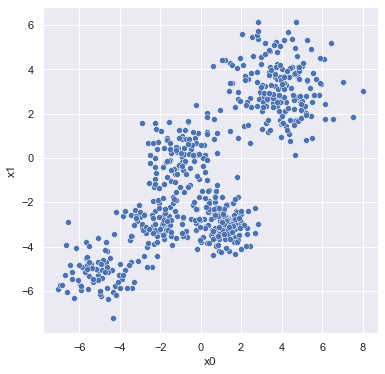

In [ ]:
fig = plt.figure(figsize=(6,6))
sns.scatterplot(data=cluster_df, x='x0',y='x1')

Método K-Means:
```python
# Importar la librería de Kmeans
from sklearn.cluster import KMeans
# Importar la librería para silhouette score
from sklearn.metrics import silhouette_score

# Seleccionar el número de clusters
model = KMeans(n_clusters = k)
# Correr algoritmo
groups = model.fit_predict(X)
# Los centros de los grupos se guardan en cluster_centers_
centros = model.cluster_centers_
# Las distancias se guardan en inertia_
wcss = model.inertia_
# Mostrar los grupos (opcional)
# pseudocódigo!
plot(X, color=groups)
```

Ahora, vamos a utilizar el método de K-Means para formar grupos y encontrar el número óptimo al correr el algoritmo para diferentes valores de k

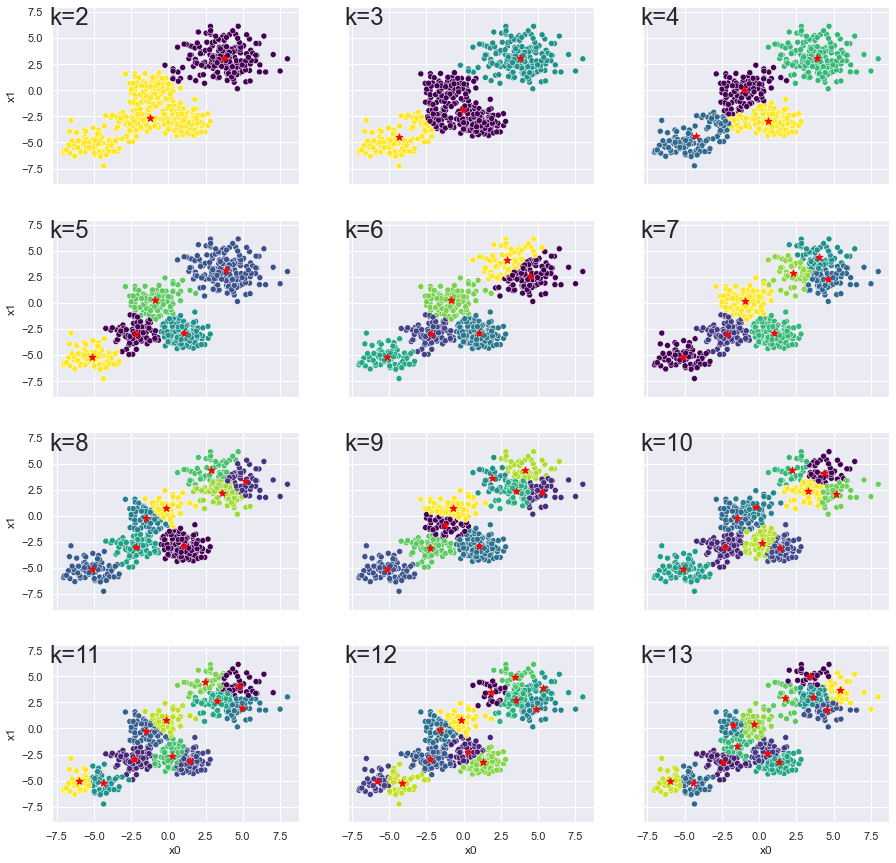

In [ ]:
from sklearn.cluster import KMeans
# Para calcular las distancias a los centros
from scipy.spatial.distance import cdist


# Vamos a formar grupos de 2, 3, ..., hasta 13
grupos = np.arange(2,14)

# Crear figura con 12 gráficos
fig, axs = plt.subplots(4,3,figsize=(15,15),sharex=True, sharey=True)

# Crear el vector para almacenar las distancias
wcss = np.zeros(12)
i = 0

# Ciclo 
for k, ax in zip(grupos, axs.flatten()):
    model = KMeans(n_clusters=k)
    clusters = model.fit_predict(cluster_df)
    # Las distancias a los centros se guardan en el atributo .inertia_ del modelo
    wcss[i] = model.inertia_
    # Centros de los grupos
    centros = model.cluster_centers_
    
    # Graficar los grupos
    sns.scatterplot(data=cluster_df, x='x0',y='x1', c=clusters, cmap='viridis',ax=ax)
    # Graficar los centros
    ax.scatter(x=centros[:,0], y=centros[:,1], color='red', marker='*', s=50)
    
    ax.set_ylim(bottom =-9, top =8)
    ax.text(-8, 8, f"k={k}",
            fontsize=24,
            horizontalalignment='left',
            verticalalignment='top')
    # Actualizar contador
    i += 1

Text(0, 0.5, 'WCSS')

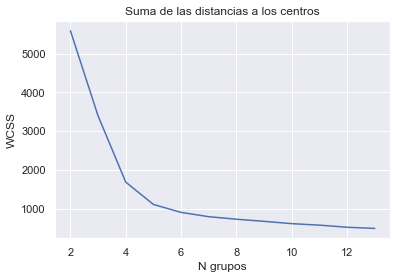

In [ ]:
# En el ciclo anterior fuimos guardando las distancias a los centros.
# Vamos a graficarlas.
fig = plt.figure(figsize=(6,4))
plt.plot(grupos, wcss)
plt.title('Suma de las distancias a los centros')
plt.xlabel('N grupos')
plt.ylabel('WCSS')

Una manera empírica para seleccionar el número de grupos es observar la gráfica enterior y buscar el punto donde se pase de tener un gran cambio a un cambio menor. Este es el **método del codo**. Como el nombre sugiere, en la gráfica de las distancias hay que buscar el *doblez* del codo.

Conforme aumentamos el número de grupos, la suma de las distancias siempre disminuye. En la gráfica podemos observar lo siguiente

  - Ir de 2 a 3 grupos disminuye considerablemente la WCSS.
  - Ir de 3 a 4 grupos disminuye considerablemente la WCSS.
  - Ir de 4 a 5 grupos disminuye considerablemente la WCSS.
  - Ir de 5 a 6 grupos disminuye moderadamente la WCSS.

Visualmente, este cambio en la disminución se representa como el *doblez* del codo.

# Silhouette Score

Silhouette se refiere a un método de interpretación y validación de la coherencia dentro del análisis de grupos. Es una medida de la condfiabilidad de que cada observación pertenezca a su respectivo clúster.

Para cada observación $x_i$:

 - $a(i)$ es la distancia promedio de $x_i$ con los datos que pertenecen al mismo clúster.
 - $b(i)$ es la distancia promedio de $x_i$ con los puntos del clúster más cercano.
    - "cercano" significa que es el clúster con menor valor de $b(i)$

$$\text{silhouette}(i) = \frac{b(i) - a(i)}{\max(a(i), b(i))} $$

El score que buscamos para evaluar la agrupación es el promedio de silhouette score de todos los puntos.

Text(0.5, 0, 'N Grupos')

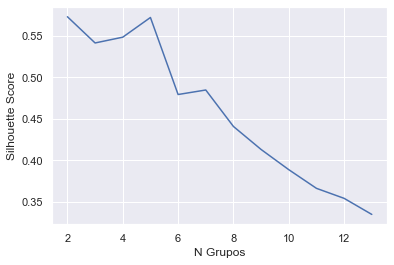

In [ ]:
from sklearn.metrics import silhouette_score
# Sacar el score Silhouette de cada agrupación
silhouette_sc = np.zeros(12)
grupos = np.arange(2,14)
i=0

for k in grupos:
    model = KMeans(n_clusters=k)
    clusters = model.fit_predict(cluster_df)
    silhouette_sc[k-2] = silhouette_score(cluster_df, clusters, metric='euclidean')

plt.plot(grupos, silhouette_sc)
plt.ylabel('Silhouette Score')
plt.xlabel('N Grupos')

# Decidiendo el número de clústers

Un valor de Score más cercano a 1 significa que los grupos están definidos y separados entre sí. Los valores más altos son para 4 y 5 grupos. Esto en conjunto con la gráfica del método del codo nos indican que el número óptimo de grupos es **5**.

In [ ]:
model = KMeans(n_clusters=5)
clusters = model.fit_predict(cluster_df)
# Vamos a agregar el indicador de cluster como una nueva columna
cluster_df['Grupo'] = clusters
cluster_df.head()

,x0,x1,Grupo
0,-2.981933,-2.667170,1
1,-0.703946,-3.307770,1
2,-2.682024,-3.397886,1
3,-2.051242,-3.306723,1
4,-2.636982,-4.025322,1


In [ ]:
# Vamos a calcular estadísticos de los datos agrupando por el grupo
cluster_df.groupby('Grupo').mean()

,x0,x1
Grupo,,
0,3.907292,3.139544
1,-2.182502,-2.930858
2,1.026315,-2.890527
3,-5.119710,-5.153392
4,-0.858773,0.275794


In [ ]:
# Veamos ahora los centros de los cluster. ¡Son los mismos!
pd.DataFrame(model.cluster_centers_, columns=['x0','x1'])

,x0,x1
0,3.907292,3.139544
1,-2.182502,-2.930858
2,1.026315,-2.890527
3,-5.119710,-5.153392
4,-0.858773,0.275794


Recordemos cómo se formaron los datos:
- a) Centro en (-2, -3). 100 observaciones con varianza de 0.75
- b) Centro en (-5, -5). 75 observaciones con varianza de 0.75
- c) Centro en (4, 3). 75 observaciones con varianza de 1.5
- d) Centro en (1, -3). 75 observaciones con varianza de 0.5
- e) Centro en (-1, -0.15). 75 observaciones con varianza de 0.75

Si comparamos los centroides y las desviaciones de cada grupo resultante del clustering contra los grupos originales, podemos ver la siguiente correspondencia:
- Grupo 0 - d
- Grupo 1 - c
- Grupo 2 - b
- Grupo 3 - e
- Grupo 4 - a

# Ejemplo de KMeans
El siguiente dataset contiene información sobre el top 50 anual de libros mejor vendidos de Amazon entre 2009 y 2019. Cuenta con datos de 550 libros.

In [ ]:
amazon_df = pd.read_csv('data/bestsellers with categories.csv')
amazon_df.head()

,Name,Author,User Rating,Reviews,Price,Year,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction


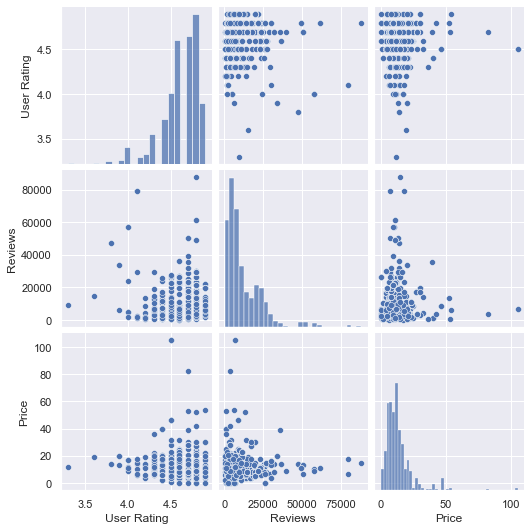

In [ ]:
# Vamos a crear clusters utilizando tres de las variables: calificación, # de reseñas y precio
# Primero vamos a hacer scatterplots de la combinación de estas variables
# Una manera rápida y fácil es con la función pairplot de Seaborn

datos = amazon_df.loc[:, ['User Rating','Reviews','Price']]
sns.pairplot(data=datos)

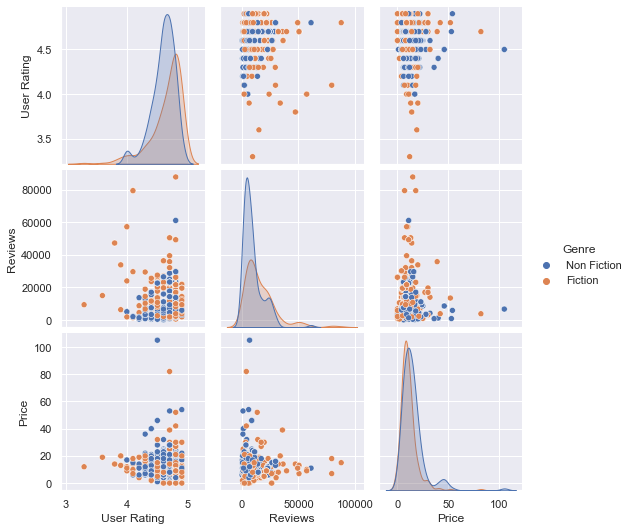

In [ ]:
# Opcional, podemos separar los datos por género. Esto lo hacemos agregando Genre a los datos y usando el parámetro hue:
sns.pairplot(data=amazon_df.loc[:, ['User Rating','Reviews','Price', 'Genre']], hue='Genre')

Podemos observar que las tres variables con las que vamos a trabajar tienen **escalas** muy diferentes:
* La calificación de los usuarios va de 1 a 5
* El número de reseñas van de 0 a casi 100,000
* El precio varía de 0 a 100

Esto puede afectar el algoritmo de KMeans, puesto que es un método que utiliza **distancia euclidiana** para calcular la cercanía de cada dato a los centroides. Cuando trabajemos con algoritmos que requieran el cálculo de esta distancia euclidiana, lo recomentable es **normalizar** las variables para eliminar la diferencia en las escalas.

Para normalizar variables en Python, utilizamos StandardScaler de SkLearn:

```
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_norm = scaler.fit_transform(X)
```

In [ ]:
# Vamos a escalar las tres variables con StandardScaler. ¿De dónde proviene el nombre Standard?
from sklearn.preprocessing import StandardScaler

# Hacemos el escalamiento.
scaler = StandardScaler()
datos_norm = scaler.fit_transform(datos)
# El escalador nos genera una matriz de numpy
# El orden de las columnas se mantiene
datos_norm

array([[ 0.35999008,  0.46045266, -0.47080975],
       [-0.08097772, -0.84478593,  0.82160918],
       [ 0.35999008,  0.59944035,  0.17539971],
       ...,
       [ 0.35999008,  0.20286897, -0.47080975],
       [ 0.35999008,  0.20286897, -0.47080975],
       [ 0.35999008,  0.20286897, -0.47080975]])

In [ ]:
# Para mantener un orden, vamos a convertir la matriz a data frame de pandas
datos_norm = pd.DataFrame(datos_norm, columns=datos.columns)
datos_norm.head()

,User Rating,Reviews,Price
0,0.359990,0.460453,-0.470810
1,-0.080978,-0.844786,0.821609
2,0.359990,0.599440,0.175400
3,0.359990,0.808050,-0.655441
4,0.800958,-0.365880,-0.101547


Text(0.5, 1.0, 'Silhouette Score')

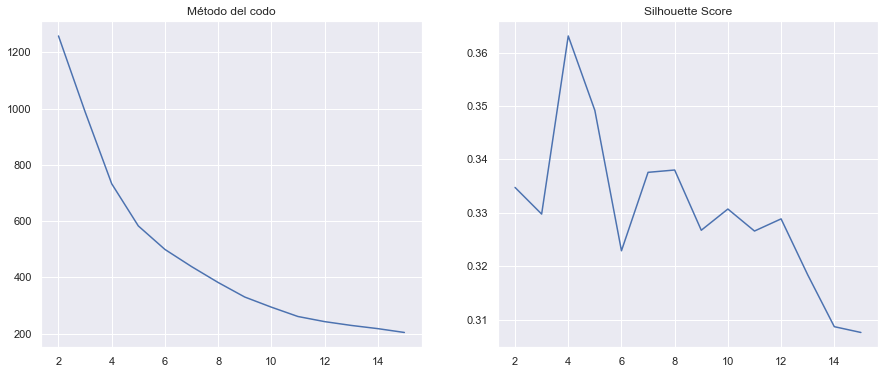

In [ ]:
# Ya con los datos normalizados, ya podemos utilizar el algoritmo de KMeans. Primero hacemos la gráfica del codo y la de sihlouette score
# Podemos empezar con grupos de 2 a 10

# Importar librerias en caso de no haberlo hecho antes
# from sklearn.cluster import KMeans
# from sklearn.metrics import silhouette_score

grupos = np.arange(2, 16)
wcss   = np.zeros(14)
sil_score = np.zeros(14)

for k in grupos:
    # Clustering
    model = KMeans(n_clusters=k)
    clusters = model.fit_predict(datos_norm)
    # WCSS
    wcss[k-2] = model.inertia_
    # Silhouette Score
    sil_score[k-2] = silhouette_score(datos_norm, clusters)
    
# Vamos a graficar el codo y silhouette score en la misma gráfica
# Recordemos que subplots nos permite tener más gráficas en la misma figura
fig, axs = plt.subplots(1,2, figsize=(15,6))

# Primera figura es el codo
axs[0].plot(grupos, wcss)
axs[0].set_title('Método del codo')

# La segunda es el Silhouette Score
axs[1].plot(grupos, sil_score)
axs[1].set_title('Silhouette Score')

De las gráficas anteriores, 4 o 5 grupos representan las opciones más viables. Empecemos con 4 grupos.

In [ ]:
# Generamos los 4 grupos
model = KMeans(n_clusters=4)
clusters = model.fit_predict(datos_norm)

# Agregamos los clusters a nuestros DATOS ORIGINALES
datos['Grupo'] = clusters

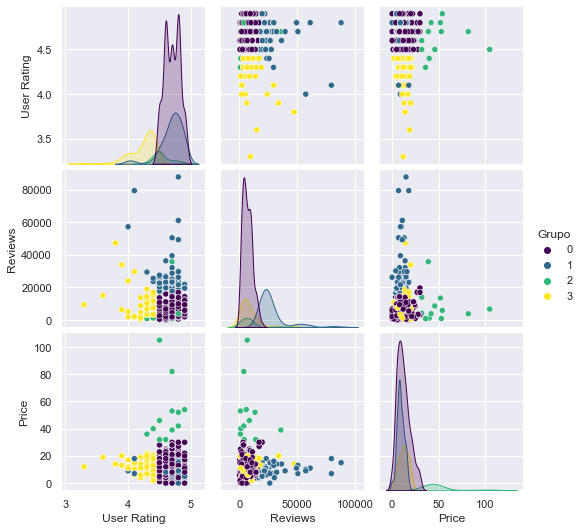

In [ ]:
# Podemos agregar los colores en el pairplot para ver las características de cada grupo
sns.pairplot(data=datos, hue='Grupo', palette='viridis')

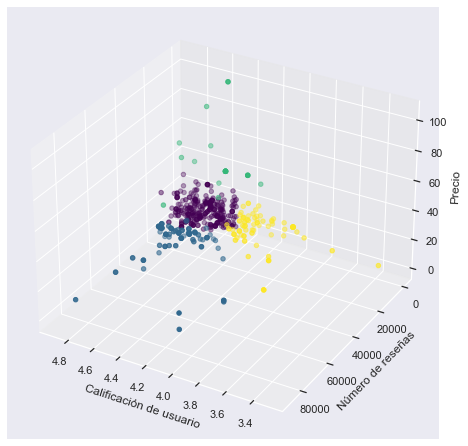

In [ ]:
# Vamos a graficar las 3 variables al mismo tiempo. Para ello, necesitamos importar una librería más
from mpl_toolkits.mplot3d import Axes3D

# Creamos la figura donde graficaremos
fig = plt.figure(figsize=(8, 6))
# Crearemos un gráfico 3D. rect nos indica el tamaño de los ejes y donde inician.
# elev y azim controlan la elevación y la rotación en el eje Z
ax  = Axes3D(fig, rect=[0, 0, 1, 1], elev=30, azim=120)

# Agregamos los nombres de los ejes
ax.set_xlabel('Calificación de usuario')
ax.set_ylabel('Número de reseñas')
ax.set_zlabel('Precio')

ax.scatter(datos['User Rating'], 
           datos['Reviews'],
           datos['Price'],
           c = datos['Grupo'],
           cmap='viridis')

In [ ]:
# Veamos las características de cada grupo (i.e. los centros)
datos.groupby('Grupo').mean()

,User Rating,Reviews,Price
Grupo,,,
0,4.698065,6753.977419,11.900000
1,4.693846,27444.646154,9.084615
2,4.538462,7219.538462,49.692308
3,4.232143,8631.666667,12.416667


Observando las gráficas y la tabla anteriores, podemos generar las siguiente conclusiones:
* El grupo 0 corresponde a libros *baratos* que tienen *pocas reseñas* y *alta calificación* promedio
* El grupo 1 corresponde a libros *baratos* con *muchas reseñas* y *alta calificación* promedio
* El grupo 2 corresponde a libros *caros* con *pocas reseñas* y *alta calificación* promedio.
* El grupo 3 corresponde a libros *baratos* con *pocas reseñas* y *calificación promedio regular*.

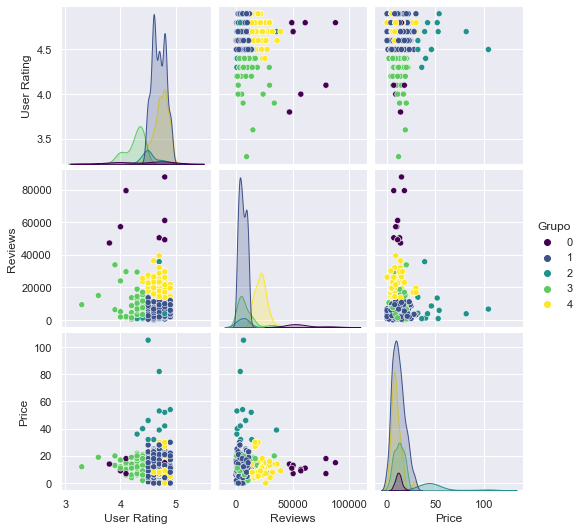

In [ ]:
# Generamos ahora 5 grupos
model = KMeans(n_clusters=5)
clusters = model.fit_predict(datos_norm)

# Agregamos los clusters a nuestros DATOS ORIGINALES
datos['Grupo'] = clusters

# Podemos agregar los colores en el pairplot para ver las características de cada grupo
sns.pairplot(data=datos, hue='Grupo', palette='viridis')

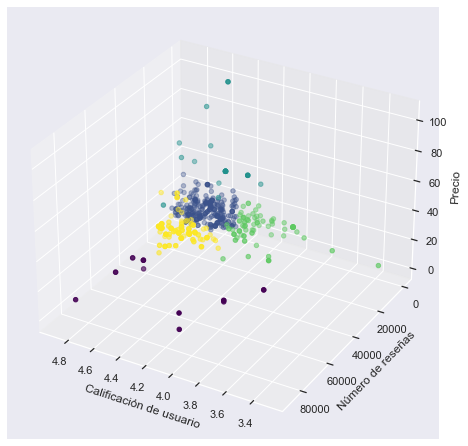

In [ ]:
# Vamos a graficar las 3 variables al mismo tiempo. Para ello, necesitamos importar una librería más
from mpl_toolkits.mplot3d import Axes3D

# Creamos la figura donde graficaremos
fig = plt.figure(figsize=(8, 6))
# Crearemos un gráfico 3D. rect nos indica el tamaño de los ejes y donde inician.
# elev y azim controlan la elevación y la rotación en el eje Z
ax  = Axes3D(fig, rect=[0, 0, 1, 1], elev=30, azim=120)

# Agregamos los nombres de los ejes
ax.set_xlabel('Calificación de usuario')
ax.set_ylabel('Número de reseñas')
ax.set_zlabel('Precio')

ax.scatter(datos['User Rating'], 
           datos['Reviews'],
           datos['Price'],
           c = datos['Grupo'],
           cmap='viridis')

In [ ]:
# Veamos las características de cada grupo
datos.groupby('Grupo').mean()

,User Rating,Reviews,Price
Grupo,,,
0,4.412500,58490.375000,11.687500
1,4.689680,5878.491103,11.804270
2,4.538462,7219.538462,49.692308
3,4.243373,7951.469880,12.313253
4,4.732639,21798.076389,9.631944


¿Qué diferencia hay contra el clustering de 4 grupos?